# Ben Keeley

## Research question/interests

I am interested in discovering if free time and lesiure activities such as weekday alchol consumption, weekend alcohol consumption, relationships, going out with friends...etc determine whether a student is more likely to perform successfully or poorly by the end of a school term. Specifically I want to determine if a moderate amount of personal indulgence can benefit a students performance, and if so by how much. On the opposite end I hope to determine the exact threshold in which too much indulgence starts to impact academic performance.

In [1]:
import pandas as pd
#Milestone 1

print("Maths")

df1 = pd.read_csv('../data/raw/Maths_formatted.csv', engine='python', on_bad_lines='skip')

display(df1)

print("Portuguese")
df2 = pd.read_csv('../data/raw/Portuguese_formatted.csv', engine='python', on_bad_lines='skip')

display(df2)

Maths


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9
395,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6


Portuguese


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11
649,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11


# Milestone 2

## Task 1: Exploratory Data Analysis

### Shape

In [2]:
shape_df1 = df1.shape
shape_df2 = df2.shape

print(f"The shape of our Maths dataframe is {shape_df1} with {shape_df1[0]} rows and {shape_df1[1]} columns.")  
print(f"The shape of our Portuguese dataframe is {shape_df2} with {shape_df2[0]} rows and {shape_df2[1]} columns.") 

The shape of our Maths dataframe is (397, 33) with 397 rows and 33 columns.
The shape of our Portuguese dataframe is (651, 33) with 651 rows and 33 columns.


We should investigate the columns as both dataframes have the same amount.

### Concat

In [3]:
print(f"The columns of Maths.csv are: \n{list(df1.columns)}")

The columns of Maths.csv are: 
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [4]:
print(f"The columns of Portuguese.csv are: \n{list(df2.columns)}")

The columns of Portuguese.csv are: 
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


The columns of our two dataframes are the same, meaning they can be concatted together to make our EDA easier. 

In [5]:
#Add a column detailing the subject of each dataset
df1['subject'] = "math"
df2['subject'] = "portuguese"
#Combine our two datasets which we can differentiate with the subject column
df = pd.concat([df1,df2], ignore_index=True)

Above, I have combined our two dataframes into a single dataframe with an additional column to denote which subject or dataset each row orignated from. Combining the datasets this way means there is potential overlap for any students attending both courses, so it will be important to aggregate by subject.

In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math


In [7]:
print(f" Number of missing values: {df.isna().sum().sum()}") 

 Number of missing values: 0


### Columns

In [8]:
print(f"List of the no. of unique values for each column:\n\n{df.nunique()}")

List of the no. of unique values for each column:

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
subject        2
dtype: int64


#### Binary Columns

From this list we can determine that a decent amount of our columns are binary, some of which may not be obvious. At a glance, without prior knowledge of our dataset it is interesting/unusual that columns such as address, school, and activities, famsize are binary. We can analyze their unique values to get a better idea.

In [9]:
print(f"The possible values of school are: \n{df.school.unique()}")

The possible values of school are: 
['GP' 'MS']


We know from our source that the datasets were collected from two seperate schools, but we have confirmed this by outputting the possible school choices above.
These values abbreviate Gabriel Pereira and Mousinho de Silverira secondary schools. If possible expand the abbreviations to make them more clear to those who have no prior knowledge.

In [10]:
print(f"The possible values of address are: \n{df.address.unique()}")

The possible values of address are: 
['U' 'R']


From name alone, we may have assumed that address would be the student's street address but our list of values suggested otherwise. Above we have printed the actual values. We know from our source that these represent urban and rural addresses, but our analysis makes it clear that they should be renamed to their actual values for clarity as 'U' and 'R' are meaningless without knowing this.

In [11]:
print(f"The possible values of activities are: \n{df.activities.unique()}")

The possible values of activities are: 
['no' 'yes']


We can see from above that the values of the 'activities' column are a simple 'yes' or 'no'. One may assume that this column would describe specific activities but our unique column values tells us this is not the case. We can rename this column later to something more descriptive, such as 'extracurricular_participation' or 'activity_participation'. 

In [12]:
print(f"The possible values of famsize are: \n{df.famsize.unique()}")

The possible values of famsize are: 
['GT3' 'LE3']


Stands for greater than 3 and less than or equal to 3. The very limited possibilities for these values make them useless to me and is not very telling. Column isn't closely related to my research on student's relaxation/leisure so will drop this table in task 2.

#### Multi-Class Columns (freetime, goout, Dalc, Walc)

My research question is on the relationship between leisure on academic success, this includes variables such as free time, going out with friends and weekend/weekday alcohol assumption. Below we will list their unique values:

In [13]:
unique_freetime = df.freetime.unique()
unique_goout = df.goout.unique()
unique_Dalc = df.Dalc.unique()
unique_Walc = df.Walc.unique()

unique_freetime.sort()
unique_goout.sort()
unique_Dalc.sort()
unique_Walc.sort()

print(f"""
freetime: {unique_freetime}
goout: {unique_goout}
Dalc: {unique_Dalc}
Walc: {unique_Walc}
""")


freetime: [1 2 3 4 5]
goout: [1 2 3 4 5]
Dalc: [1 2 3 4 5]
Walc: [1 2 3 4 5]



Looking at the ordered unique values we have a 1-5 scale for each variable, meaning the columns are not continous. 

#### Naming

Many of the column names are ambiguous. Columns names such as paid, famsup, and higher are not descriptive enough of what their values are. The dataset's source describes each variable, but certain columns should be renamed or removed as a part of our cleanup.

Below I have listed the column names that I believe to be non-descriptive or too brief, and may require further clarification in task 2:

- Pstatus
- reason 
- schoolsup 
- famsup    
- paid      
- nursery   
- higher    
- nursery
- paid
- higher 
- famrel  
- Dalc   
- Walc   
- G1, G2, G3

### Description
#### Math

In [14]:
df[df['subject'] == "math"].describe().T

,count,mean,std,min,25%,50%,75%,max
age,397.0,16.705290,1.279716,15.0,16.0,17.0,18.0,22.0
Medu,397.0,2.748111,1.097301,0.0,2.0,3.0,4.0,4.0
Fedu,397.0,2.521411,1.090672,0.0,2.0,2.0,3.0,4.0
traveltime,397.0,1.450882,0.696840,1.0,1.0,1.0,2.0,4.0
studytime,397.0,2.032746,0.838731,1.0,1.0,2.0,2.0,4.0
failures,397.0,0.335013,0.742714,0.0,0.0,0.0,0.0,3.0
famrel,397.0,3.944584,0.894400,1.0,4.0,4.0,5.0,5.0
freetime,397.0,3.234257,0.996476,1.0,3.0,3.0,4.0,5.0
goout,397.0,3.108312,1.112762,1.0,2.0,3.0,4.0,5.0
Dalc,397.0,1.478589,0.889143,1.0,1.0,1.0,2.0,5.0


#### Portuguese

In [15]:
df[df['subject'] == "portuguese"].describe().T

,count,mean,std,min,25%,50%,75%,max
age,651.0,16.745008,1.217609,15.0,16.0,17.0,18.0,22.0
Medu,651.0,2.516129,1.134481,0.0,2.0,2.0,4.0,4.0
Fedu,651.0,2.308756,1.100308,0.0,1.0,2.0,3.0,4.0
traveltime,651.0,1.569892,0.747889,1.0,1.0,1.0,2.0,4.0
studytime,651.0,1.930876,0.828241,1.0,1.0,2.0,2.0,4.0
failures,651.0,0.221198,0.592449,0.0,0.0,0.0,0.0,3.0
famrel,651.0,3.930876,0.954253,1.0,4.0,4.0,5.0,5.0
freetime,651.0,3.181260,1.049990,1.0,3.0,3.0,4.0,5.0
goout,651.0,3.187404,1.174824,1.0,2.0,3.0,4.0,5.0
Dalc,651.0,1.500768,0.923830,1.0,1.0,1.0,2.0,5.0


Above are the popular statistic measures for our data columns seperated by subject. Some observations are:

- The maximum age overall is 22 which is uncharacteristic for students in secondary school. These older students are likely to be outliers and we may wish to remove them when cleaning our data.
- traveltime and studytime have a discrete range (min=1, max=4). From the source's description these values can be converted into a set of pre-defined ranges where 1 is the minimum and 4 is the maximum weekly time spent studying. studytime then, should be renamed to weekly studytime.
- It appears that on average students in math have ~2 more absences than students in portuguese (5.7 vs 3.7), but the standard deviation for absences overall is very high (std > mean).
- Mean grades seem to be higher in each period (G1,G2,G3) for the students taking Portuguese compared to Math. However these means are within each other's standard deviation.

### Visualizations

In [16]:
import matplotlib.pyplot as plt 

#### Grade Distributions

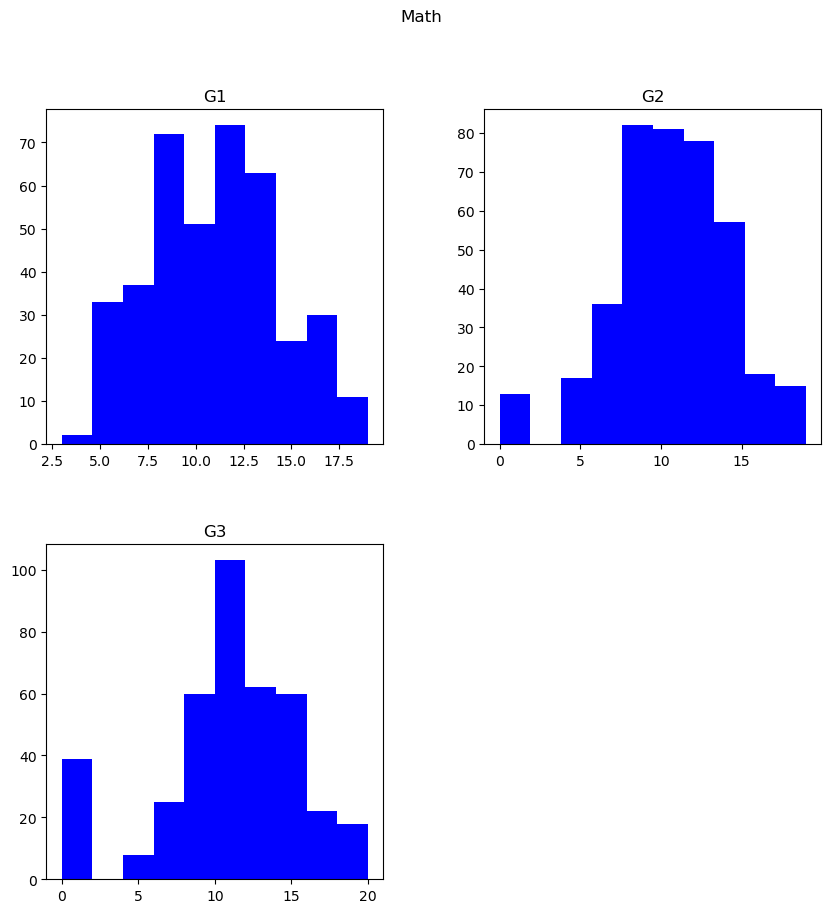

In [17]:
df[df['subject'] == "math"].hist(bins=10,figsize =(10,10), column=['G1','G2','G3'], grid=False, facecolor='b')
plt.suptitle('Math')
plt.show()

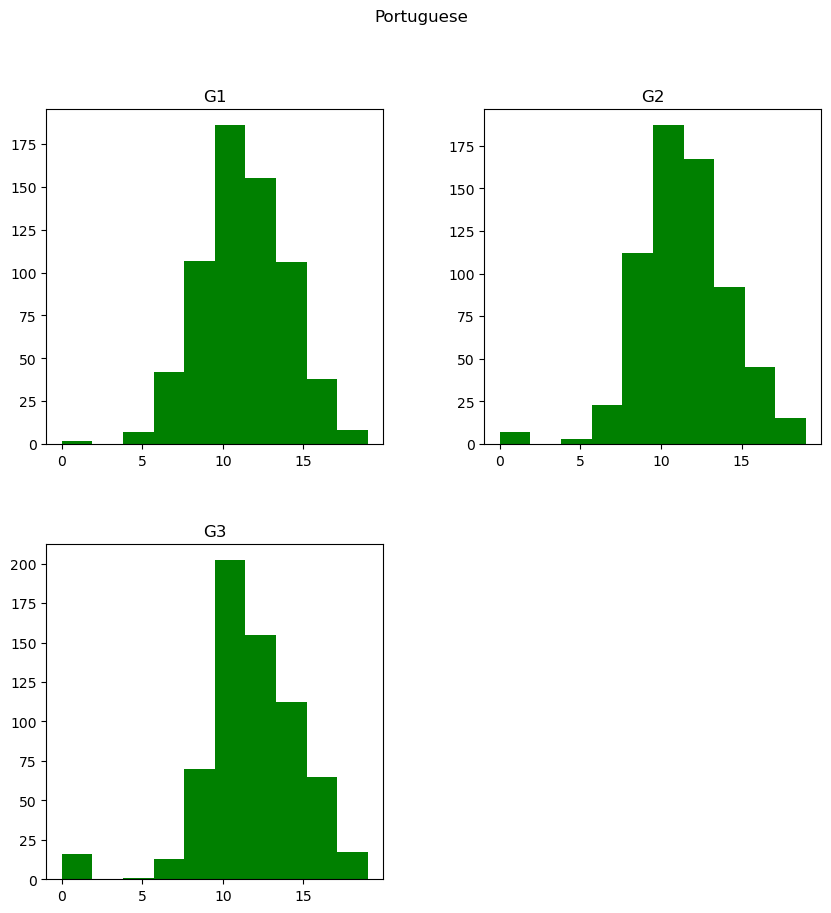

In [18]:
df[df['subject'] == "portuguese"].hist(bins=10,figsize =(10,10), column=['G1','G2','G3'], grid=False, facecolor='g')
plt.suptitle('Portuguese')
plt.show()

In education, we would expect our grade distributions to be fairly normal. However for Portuguese we have a left skew, particularly for the G2(period2) and G3(final grade) histograms. This tells us that our students tend to pass more and get higher grades than normal when taking Portuguese, as more observations are on the right side of the range. The G1(period1) histogram appear to have a bimodal distribution, seen by the two peaks. The bimodal distribution suggests a groupings of students which may be worth exploring. The G3 or final grade distribution shows a high amount of failures on the left end of the histogram for Math.

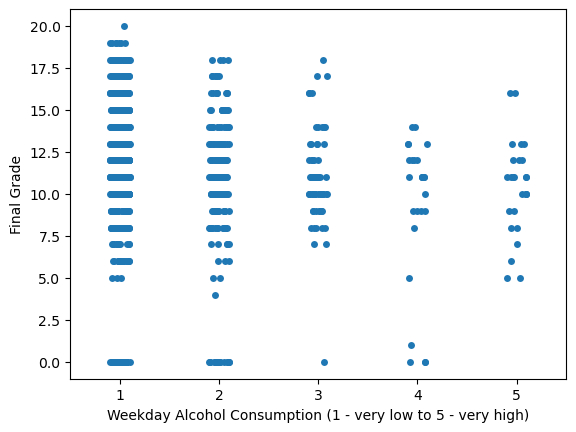

In [19]:
import seaborn as sns

sns.stripplot(x='Dalc', y='G3', data=df, size=5)
plt.ylabel('Final Grade')
plt.xlabel('Weekday Alcohol Consumption (1 - very low to 5 - very high)') 
plt.show()

Stripplot of final grades of students based on weeekday alcohol consumption. The number of students and performance seems to dwindle with a higher weekday alcohol intake. Students with an alcohol intake > 4 are unable to score higher than 15 for their final grade with a single exception. Interestingly students with a 0 score appear to be more prevalent in the 1 and 2 levels, and there are no zero scores on the 5th level. Likely due to other factor.

Text(0.5, 0, 'Free Time After School (1 - very low to 5 - very high)')

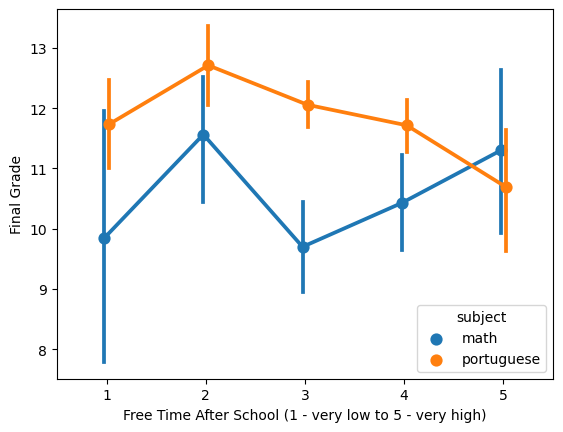

In [20]:
df_temp = df.copy(deep=True)
sns.pointplot(data=df, x="freetime", y="G3", hue= "subject",  dodge=True)
plt.ylabel('Final Grade')
plt.xlabel('Free Time After School (1 - very low to 5 - very high)')

A point plot of a student's free time after school and their final grades seperated by subject. The uncertainty indicated by the bars is very high for the min and max free time measures for students in math. Math students that have a little or lots of free time are expected to have much more varied grades than those inbetween. Indicated by the plot points which represent the central tendency of each free time measure, portuguese student grades seem to get higher as freetime values decrease towards the minimum. However at the minimum (x=1) we start to see a decrease in performance. Math students show different behaviour as when freetime is 2 and 5 we see the highest grade. However both conclusion can vary due to the high uncertainity values in each subject.

## Task 2 Set up an Analysis Pipeline
### Load Data

In [21]:
raw_math = pd.read_csv('../data/raw/Maths_formatted.csv', engine='python', on_bad_lines='skip')
raw_portuguese = pd.read_csv('../data/raw/Portuguese_formatted.csv', engine='python', on_bad_lines='skip')

### Merge Data Sets

In [22]:
raw_math['subject'] = "math"
raw_portuguese['subject'] = "portuguese"
combined_data = pd.concat([df1,df2], ignore_index=True)

### Rename Columns
As mentioned prior, misleading or ambiguous columns should be renamed to make them more clear based on the actual source description. Standardize column names using snake_case.

In [23]:
#Convert everything to snake case and improve naming
column_mapper = {'famsize': 'family_size', 'Pstatus': 'parent_living_status', 
          'Medu': "mother_edu", 'Fedu': 'father_edu', 'Mjob':'mother_job', 'Fjob' : 'father_job', 'reason' : 'enrollment_reason',
          'traveltime':'travel_time', 'studytime': 'weekly_study_time', 'schoolsup':'school_support', 
          'famsup': 'family_support', 'paid':'extra_paid_classes', 'activities': 'activity_participation',
          'higher': 'higher_education_plan', 'nursery' : 'attended_nursery_school','famrel': 'family_relations', 'freetime':'free_time', 
          'goout': 'out_w/_friends', 'Dalc' : 'weekday_alcohol', 'Walc' : 'weekend_alcohol',
          'G1': 'first_period_grade', 'G2': 'second_period_grade', 'G3':'final_grade'
         }

combined_data.rename(columns=column_mapper, inplace=True)
print(f"New columns: \n{list(combined_data.columns)}")

New columns: 
['school', 'sex', 'age', 'address', 'family_size', 'parent_living_status', 'mother_edu', 'father_edu', 'mother_job', 'father_job', 'enrollment_reason', 'guardian', 'travel_time', 'weekly_study_time', 'failures', 'school_support', 'family_support', 'extra_paid_classes', 'activity_participation', 'attended_nursery_school', 'higher_education_plan', 'internet', 'romantic', 'family_relations', 'free_time', 'out_w/_friends', 'weekday_alcohol', 'weekend_alcohol', 'health', 'absences', 'first_period_grade', 'second_period_grade', 'final_grade', 'subject']


### Rename values

Expand the string values of school, parent_living_status, and address to make them more readable. 

In [24]:
print(f'address values: {combined_data.address.unique()}')
print(f'school values: {combined_data.school.unique()}')
print(f'parent_living_status values: {combined_data.parent_living_status.unique()}')

address values: ['U' 'R']
school values: ['GP' 'MS']
parent_living_status values: ['A' 'T']


In [25]:
combined_data['address'] = combined_data['address'].map({'U':'urban', 'R':'rural'})
print(f'Renamed address values: {combined_data.address.unique()}')

Renamed address values: ['urban' 'rural']


In [26]:
combined_data['school'] = combined_data['school'].map({'GP': 'Gabriel Pereira', 'MS':'Mousinho da Silveira'})
print(f'Renamed school values: {combined_data.school.unique()}')

Renamed school values: ['Gabriel Pereira' 'Mousinho da Silveira']


In [27]:
combined_data['parent_living_status'] = combined_data['parent_living_status'].map({'A': 'apart', 'T':'together'})
print(f'Renamed parent_living_status values: {combined_data.parent_living_status.unique()}')

Renamed parent_living_status values: ['apart' 'together']


### Remove columns

The column famsize, now family_size, was determined to be useless previously after listing its limited possible values. Nursery school attendence (nursery/attended_nursery_school) is unrelated to leisure and freetime. I cannot foresee using it for any related reason. These columns will be removed.

In [28]:
#Method chaining this will be done first.
del combined_data['family_size']
del combined_data['attended_nursery_school']

print(f"w/ removed columns: \n{list(combined_data.columns)}")

w/ removed columns: 
['school', 'sex', 'age', 'address', 'parent_living_status', 'mother_edu', 'father_edu', 'mother_job', 'father_job', 'enrollment_reason', 'guardian', 'travel_time', 'weekly_study_time', 'failures', 'school_support', 'family_support', 'extra_paid_classes', 'activity_participation', 'higher_education_plan', 'internet', 'romantic', 'family_relations', 'free_time', 'out_w/_friends', 'weekday_alcohol', 'weekend_alcohol', 'health', 'absences', 'first_period_grade', 'second_period_grade', 'final_grade', 'subject']


### Cleaned Dataset

In [29]:
combined_data

,school,sex,age,address,parent_living_status,mother_edu,father_edu,mother_job,father_job,enrollment_reason,...,free_time,out_w/_friends,weekday_alcohol,weekend_alcohol,health,absences,first_period_grade,second_period_grade,final_grade,subject
0,Gabriel Pereira,F,18,urban,apart,4,4,at_home,teacher,course,...,3,4,1,1,3,6,5,6,6,math
1,Gabriel Pereira,F,17,urban,together,1,1,at_home,other,course,...,3,3,1,1,3,4,5,5,6,math
2,Gabriel Pereira,F,15,urban,together,1,1,at_home,other,other,...,3,2,2,3,3,10,7,8,10,math
3,Gabriel Pereira,F,15,urban,together,4,2,health,services,home,...,2,2,1,1,5,2,15,14,15,math
4,Gabriel Pereira,F,16,urban,together,3,3,other,other,home,...,3,2,1,2,5,4,6,10,10,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,Mousinho da Silveira,F,18,urban,together,1,1,other,other,course,...,1,1,1,1,5,6,11,12,9,portuguese
1044,Mousinho da Silveira,M,17,urban,together,3,1,services,services,course,...,4,5,3,4,2,6,10,10,10,portuguese
1045,Mousinho da Silveira,M,18,rural,together,3,2,services,other,course,...,4,1,3,4,5,4,10,11,11,portuguese
1046,Gabriel Pereira,F,18,urban,apart,4,4,at_home,teacher,course,...,3,4,1,1,3,4,0,11,11,portuguese


## Task 3 Method Chaining

Now that I have my pipeline thought out, I can streamline it and make a modular function that individually loads and cleans our dataframes with method chaining. I've created an additional utility method to combine the resulting dataframes together.

In [30]:
import project_functions2 as pf

clean_df = pf.combine_processed_subjects({'math': pf.load_and_process('../data/raw/Maths_formatted.csv'),'portuguese': pf.load_and_process('../data/raw/Portuguese_formatted.csv')})
clean_df

,school,sex,age,address,parent_living_status,mother_edu,father_edu,mother_job,father_job,enrollment_reason,...,free_time,out_w/_friends,weekday_alcohol,weekend_alcohol,health,absences,first_period_grade,second_period_grade,final_grade,subject
0,Gabriel Pereira,F,18,urban,apart,4,4,at_home,teacher,course,...,3,4,1,1,3,6,5,6,6,math
1,Gabriel Pereira,F,17,urban,together,1,1,at_home,other,course,...,3,3,1,1,3,4,5,5,6,math
2,Gabriel Pereira,F,15,urban,together,1,1,at_home,other,other,...,3,2,2,3,3,10,7,8,10,math
3,Gabriel Pereira,F,15,urban,together,4,2,health,services,home,...,2,2,1,1,5,2,15,14,15,math
4,Gabriel Pereira,F,16,urban,together,3,3,other,other,home,...,3,2,1,2,5,4,6,10,10,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,Mousinho da Silveira,F,18,urban,together,1,1,other,other,course,...,1,1,1,1,5,6,11,12,9,portuguese
1044,Mousinho da Silveira,M,17,urban,together,3,1,services,services,course,...,4,5,3,4,2,6,10,10,10,portuguese
1045,Mousinho da Silveira,M,18,rural,together,3,2,services,other,course,...,4,1,3,4,5,4,10,11,11,portuguese
1046,Gabriel Pereira,F,18,urban,apart,4,4,at_home,teacher,course,...,3,4,1,1,3,4,0,11,11,portuguese


Looks like the function completes my Analysis Pipeline as intended.

### Task 4 Conduct your analysis to help answer your research question(s)

#### Revaluating previous plots and restating conclusions with cleaned data.

Text(0.5, 0, 'Free Time After School (1 - very low to 5 - very high)')

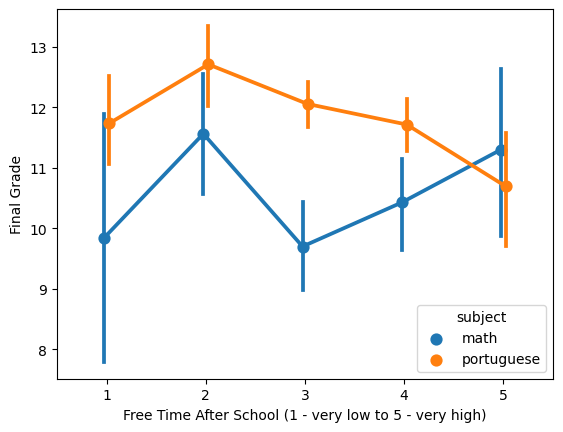

In [31]:
sns.pointplot(data=clean_df, x="free_time", y="final_grade", hue= "subject",  dodge=True)
plt.ylabel('Final Grade')
plt.xlabel('Free Time After School (1 - very low to 5 - very high)')

Our point plot remains unchanged with our clean data. Restating what was discovered in my EDA, we can see that portuguese students with less free time seem to do better, but students with too little free time (x=1) are worse off then those that have some moderation (x=2,3). So to answer my research question on moderation, in the case of portuguese, less free time is usually better for a student's final grade performance but having some freetime in moderation is better than having very little or none at all.

In math the point plot shows students perform better when they have a small amount of free time (x=2) or when then have a very large amount of freetime (x=5) which differs from portuguese. So in the case of math we can say that students with a lot of free time do well, and students with only a little moderation do well, but students outside of these tend to poorer. Of course our larger vertical lines suggest that this very much depends on the indiviudal students.

It is important again to note by the large error bars, especially for math, that there is a lot amount of variation within these conclusions we have drawn based on the points and that a more advanced analsyis is required to draw definitive answers.

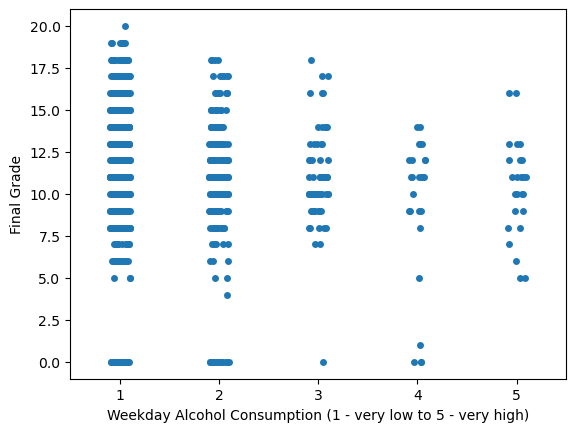

In [32]:
sns.stripplot(x='weekday_alcohol', y='final_grade', data=clean_df, size=5)
plt.ylabel('Final Grade')
plt.xlabel('Weekday Alcohol Consumption (1 - very low to 5 - very high)') 
plt.show()

Again restating what I said earlier on weekday alcohol consumption we can see students with alcohol consumption > 4 are unable to score 15 or more. So, high weekday consumption seems to be detrimental to some extent, but not as much as one may expect. The subset of students who consume a low amount (x = 1,2) do still have many failures, meaning weekday alcohol consumption is not the only factor for poor grades. This is also considering the low amount of zero scores when consumption is >3, but this may be due simply to the larger amount of students in the first two categories. 

With regards to my question on moderation, from the plot we can see that the higher performers are stil primarily in the first two groups. The middle group only seems to have a small amount of high perfomers, which means that a moderate weekday alchol consumption does not seem to provide clear benefits to a students final grade. Of course weekday alcohol consumption is not generally considered something to be done in moderation, but we do see a large amount of higher performers in the second lowest category.

Since we are now analyzing our data to answer my research questinon I would like to compare this to weekend alcohol consumption in a similar plot.

#### Analyzing additional plots

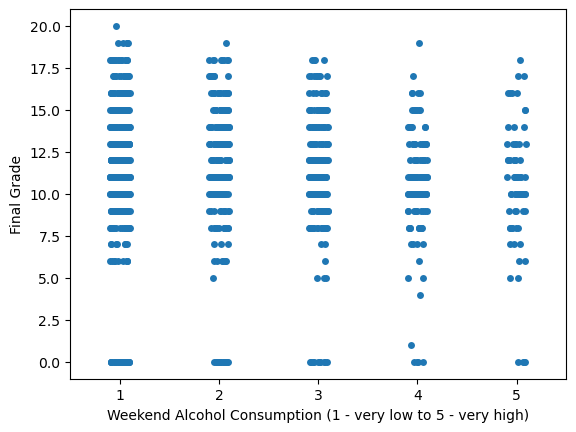

In [33]:
sns.stripplot(x='weekend_alcohol', y='final_grade', data=clean_df, size=5)
plt.ylabel('Final Grade')
plt.xlabel('Weekend Alcohol Consumption (1 - very low to 5 - very high)') 
plt.show()

Consuming alcohol on weekends is considered to be much more moderate, which seems to reflect in our plot. More students seem to consume alcohol on weekends and the ones that do, still seem to perform fairly well. Though our 1 classifier still has the highest performers. We can say that while students can moderately enjoy alcohol on weekends we do see a decline in the number of points assoicated with some higher scores as this 1-5 measure of consumption increases on our stripplot. This seems to contrast the weekday alcohol plot which shows this higher consumption to be more deterimental to final grade.

Text(0.5, 0, 'Participates in activities')

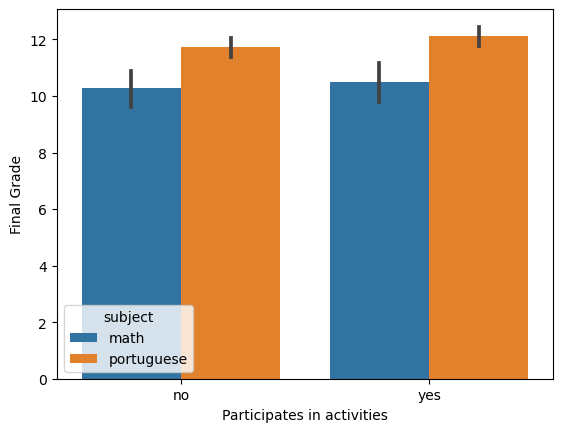

In [34]:
sns.barplot(x ='activity_participation', y ='final_grade', data = clean_df, hue ='subject')
plt.ylabel('Final Grade')
plt.xlabel('Participates in activities') 

It appears that whether or not students participate in extracurricular activities has little association or relation to their final grade scores from our barplot.

Text(0.5, 0, 'In a relationship')

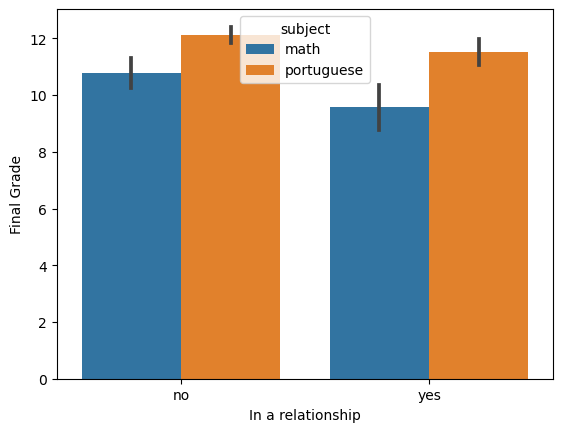

In [35]:
sns.barplot(x ='romantic', y ='final_grade', data = clean_df, hue ='subject')
plt.ylabel('Final Grade')
plt.xlabel('In a relationship') 

Our romantic relations barplot, suggests higher grades for students not in a relationship for both subjects. However the error bars indicate that the grade differences can vary. In general though we can still say that we can expect slightly higher grades fro students that are not invovled within a romantic relation.

#### In summary
From the findings we can answer my research questions and say that students that are 'easy going' tend to do worse, although they can perform closely or comparitively as shown in some of our plots such as the freetime Math pointplot. In general, we can say that moderation for our measures such as weekday alcohol consumption and weekend alcohol consumption does not provide any clear benefits from our data visualization. Although we may suggest that some moderation when it comes to leisure such as freetime does lead to higher grades compared to having no moderation at all. Finally, extracurricular pariticpation appears to provide little benefits for grades in our sample, but refraining from a romantic relation does which reinforces that leisure activities are generally more detrimental than beneficial to final grades.

In [36]:
# Milestone 4

## Task 1 
clean_df.to_csv("../data/processed/clean_analysis2.csv")